In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
brack = gpd.read_file('../data/bike_racks(GIS).geojson')

In [3]:
print(brack.crs)

epsg:4326


In [4]:
brack.head(10)

,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,36.0499277778,12,POINT (-86.65545 36.04993)
1,Stones River Greenway - Donelson/Hermitage Area,2,Greenway,Public,114,2,Existing,-86.6340625226,Rack,Health Dept,36.1852800378,4,POINT (-86.63406 36.18528)
2,"Percy Priest Reservoir, Stones River Greenway",0,Park/Greenway,Public,256,3,Proposed,-86.6206705697,Rack,Health Dept,36.1584215986,0,POINT (-86.62067 36.15842)
3,"Two Rivers Golf Course, Stones River Greenway ...",1,Park/Greenway,Public,115,4,Existing,-86.6865259267,Rack,Health Dept,36.1875466948,5,POINT (-86.68653 36.18755)
4,East Park & Community Center,3,Park/Community Center,Public,103,5,Existing,-86.7621800831,Rack,Health Dept,36.1724554062,15,POINT (-86.76218 36.17246)
5,Shelby Bottoms Park & Greenway,1,Park/Greenway,Public,116,6,Existing,-86.7247647834,Rack,Health Dept,36.1665911938,5,POINT (-86.72476 36.16659)
6,Shelby Bottoms Park & Greenway,8,Park/Greenway,Public,117,7,Existing,-86.723953674,Rack,Health Dept,36.1669023034,16,POINT (-86.72395 36.16690)
7,Shelby Bottoms Park & Greenway,1,Park/Greenway,Public,118,8,Existing,-86.7247342306,Rack,Health Dept,36.1657661936,5,POINT (-86.72473 36.16577)
8,Metro Public Works,0,Metro Office,Public,257,9,Proposed,-86.760244445,Rack,Health Dept,36.1639388889,0,POINT (-86.76024 36.16394)
9,"Bus Stop; Church St at 5th Ave N, Fifth Third ...",0,Bus Stop,Public,83,10,Future Artistic,-86.7799546267,Rack,Health Dept,36.1633719897,0,POINT (-86.77995 36.16337)


In [5]:
nashpmap = gpd.read_file('../data/metro_parks_boundaries(GIS).geojson')

In [6]:
print(nashpmap.crs)

epsg:4326


In [7]:
nashpmap.head(10)

,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."
5,1113.12,Edwin Warner Park,1937,Edwin Warner,PARK,50 Vaughn Rd,-86.9074396,36.05688279,"Edwin Warner Park is a great, multi-recreation...","MULTIPOLYGON (((-86.89420 36.04865, -86.89429 ..."
6,8.53,H. G. Hill Park,2012,H. G. Hill,PARK,6710 Charlotte Pike,-86.88757407,36.13619596,"H.G. Hill Park is a small, friendly park with ...","MULTIPOLYGON (((-86.88729 36.13620, -86.88735 ..."
7,1991.56,Percy Warner Park,1926,Percy Warner,PARK,7311 Hwy100,-86.88419854,36.06729215,Percy Warner Park is 2684 acres of forest and ...,"MULTIPOLYGON (((-86.87147 36.07105, -86.87149 ..."
8,25.24,Charlotte Park,1964,Charlotte,PARK,6031 Deal Ave,-86.87070668,36.15454327,"A nice, family oriented park.","MULTIPOLYGON (((-86.86852 36.15547, -86.86854 ..."
9,18.38,Joelton Park,1989,Joelton,PARK,21 Joelton Community Center Rd,-86.87022094,36.31718158,Joelton Park is a multi-recreational park with...,"MULTIPOLYGON (((-86.86987 36.31832, -86.86921 ..."


In [8]:
nashpmap.shape

(287, 10)

<AxesSubplot:>

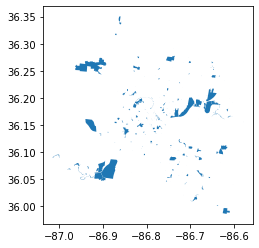

In [9]:
nashpmap.plot()

In [10]:
zipcodes = gpd.read_file('../data/onlyzipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


<AxesSubplot:>

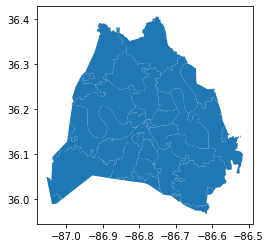

In [11]:
zipcodes.plot()